# Methodologies for image processing of radar remote sensing data #

## Lecture 7. Evapotranspiration

**Your task:**1. You will visualise the triangle using the Landsat spectral images2. In particular, you should start from visualising the simplest version first, where the TIR is plotted against NDVI without normalisations.


**Dataset:** 
On the server you can find two Landsat datasets. They are only sub-areas of the entire datasets and they are saved as Matlab files to save space.

1. New Orleans on the 3/May/2012

2. Waldshut on the 18/July/2014

They present some different environments and therefore we may expect different results.

**Processing steps:**
1. Read the two Landsat datasets
2. Optional: do some average to make the fractional model more applicable!
3. Extract the NDVI index
4. Plot it against TIR
5. Normalise the NDVI and the TIR using control points



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## Select your region by changing the path = './Waldshut/' or path = './New_Orleans/'

In [2]:
# The area under analysis is close to Waldshut, on the North of the Rein (Germany).
#path = './Waldshut/'
# The area under analysis is near New Orleans (USA).
path = './New_Orleans/'

# Load data from MAT file
data = scipy.io.loadmat(path + 'bands.mat')
B1, B2, B3, B4, B5, B6, B7, B8, TIR = (
    data['B1'], data['B2'], data['B3'], data['B4'],
    data['B5'], data['B6'], data['B7'], data['B8'], data['TIR']
)

print('finished loading data')

finished loading data


## Visualize images in different bands ##

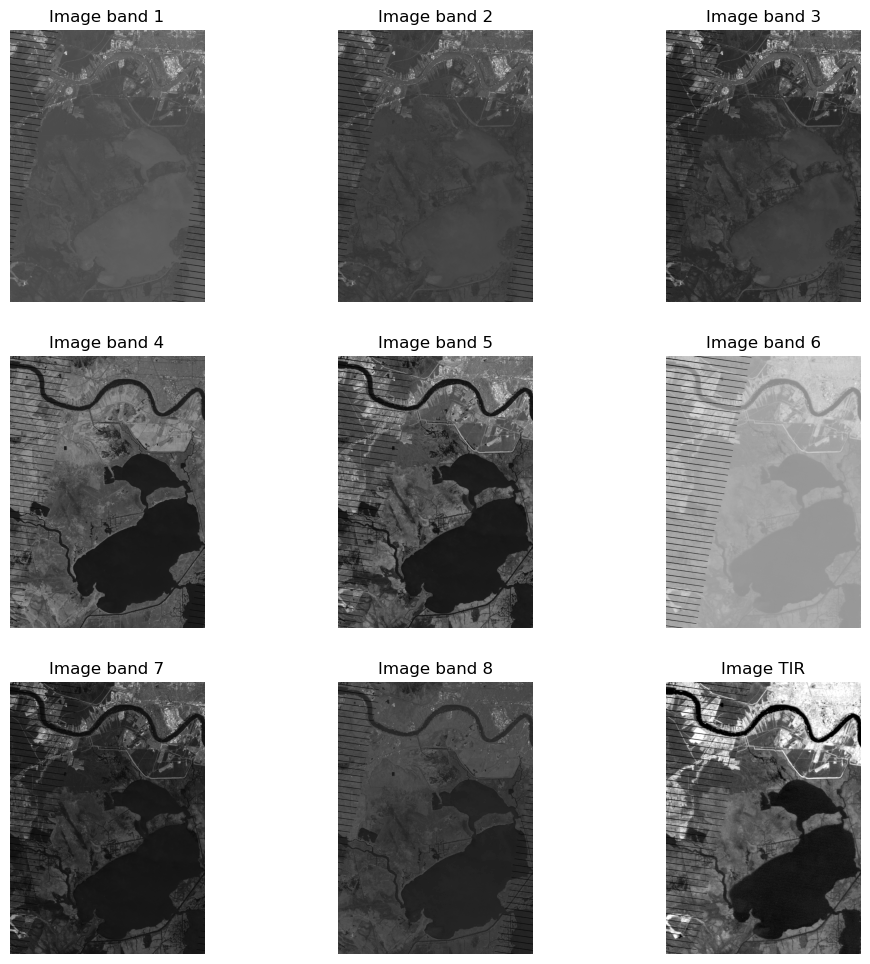

Text(0.5, 1.0, 'Histogram of TIR')

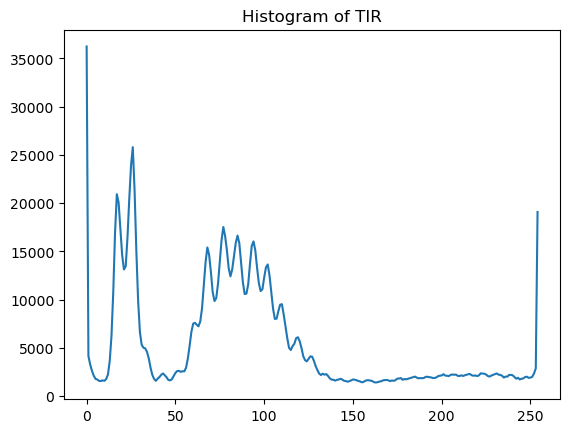

In [3]:
#---Visualize images----
def visualize_image(image, title, row, col, index):
    plt.subplot(row, col, index)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Set up subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Visualize images in subfigures
visualize_image(B1, 'Image band 1', 3, 3, 1)
visualize_image(B2, 'Image band 2', 3, 3, 2)
visualize_image(B3, 'Image band 3', 3, 3, 3)
visualize_image(B4, 'Image band 4', 3, 3, 4)
visualize_image(B5, 'Image band 5', 3, 3, 5)
visualize_image(B6, 'Image band 6', 3, 3, 6)
visualize_image(B7, 'Image band 7', 3, 3, 7)
visualize_image(B8, 'Image band 8', 3, 3, 8)
visualize_image(TIR, 'Image TIR', 3, 3, 9)

# Save the figure
#plt.savefig('visualize_images.png', bbox_inches='tight') # Save figure

plt.show()

# Convert image data to double
B1, B2, B3, B4, B5, B6, B7, B8, TIR = [img.astype(float) for img in [B1, B2, B3, B4, B5, B6, B7, B8, TIR]]

# Calculate the histogram of TIR
xaxis = np.arange(256)
h, _ = np.histogram(TIR.ravel(), bins=xaxis)
plt.figure()
plt.plot(h)
plt.title('Histogram of TIR')


In [4]:
# You can also consider a pubportion of the entire image to test the algorithm
# B3n = B3[0:500,300:800]
# B4n = B4[0:500,300:800]
# TIRn = TIR[0:500,300:800]

#otherwise:
B3n = B3
B4n = B4
TIRn = TIR

# Define a function for filtering the image
from scipy.signal import convolve as scipy_convolve

def moving_average(data, smoothSize):
    smoothWindow = 1 / (smoothSize * smoothSize) * np.ones((smoothSize, smoothSize))
    return scipy_convolve(data, smoothWindow, mode='same', method='direct')

# Apply moving average to the selected bands
sw = 21
B3n = moving_average(B3n, sw)
B4n = moving_average(B4n, sw)
TIRn = moving_average(TIRn, sw)
print('finished smoothing')

finished smoothing


## now, we visualize the images as visible RGB

Text(0.5, 1.0, 'RGB 321 after stretching')

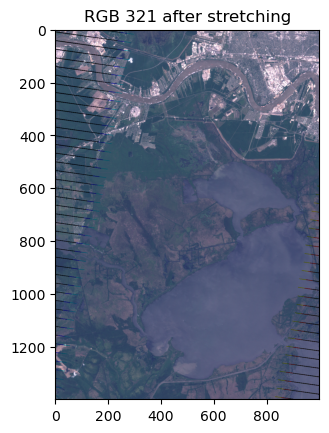

In [5]:
RGB321 = np.zeros(B1.shape + (3,))
RGB321[..., 0] = B3 / 255.0
RGB321[..., 1] = B2 / 255.0
RGB321[..., 2] = B1 / 255.0

stretched_RGB321 = np.clip((RGB321 - 0.1*np.mean(RGB321[~np.isnan(RGB321)])) / (2.5*np.mean(RGB321[~np.isnan(RGB321)]) - 0.1*np.mean(RGB321[~np.isnan(RGB321)])), 0, 1)
plt.figure()
plt.imshow(stretched_RGB321)
plt.title('RGB 321 after stretching')

## let's calculate NDVI and plot it


Text(0, 0.5, 'Frequency')

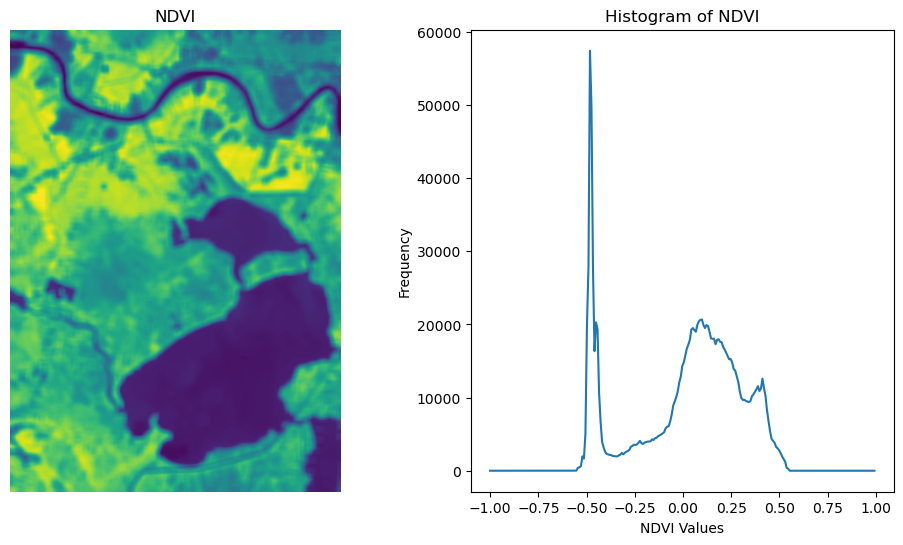

In [6]:
NDVI = (B4n - B3n) / (B4n + B3n)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Subfigure 1: NDVI Image
axs[0].imshow(NDVI)
axs[0].set_title('NDVI')
axs[0].axis('off')  
# Subfigure 2: Histogram of NDVI
xaxis = np.linspace(-1, 1, num=256)  # Define the x-axis values
hist, bins = np.histogram(NDVI.ravel(), bins=xaxis)
axs[1].plot(bins[:-1], hist)
axs[1].set_title('Histogram of NDVI')
axs[1].set_xlabel('NDVI Values')
axs[1].set_ylabel('Frequency')



## let's now plot TIR/NDVI on the triangle


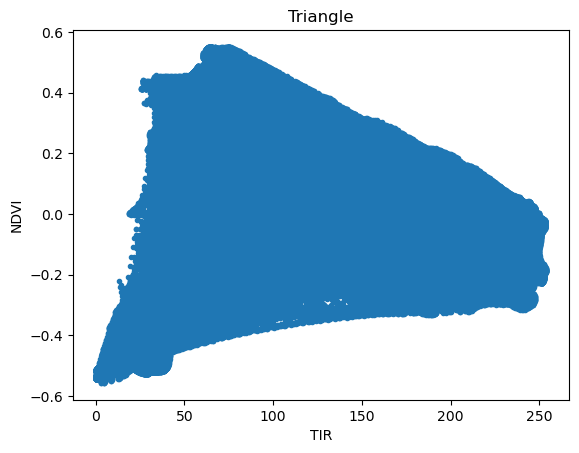

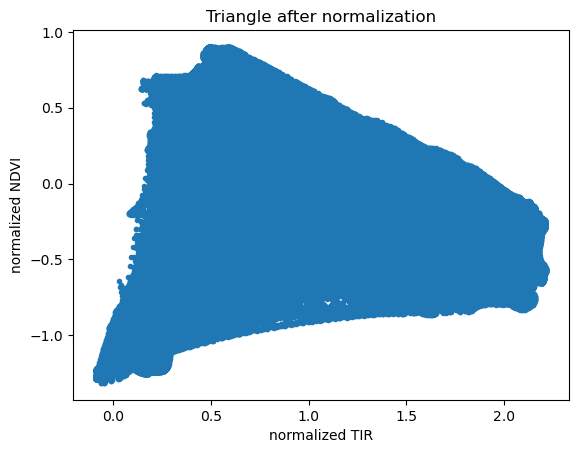

In [7]:
plt.figure()
plt.plot(TIRn.ravel(), NDVI.ravel(), '.')
plt.title('Triangle')
plt.xlabel('TIR')
plt.ylabel('NDVI')

# Then, let's calculate and plot the parameters on the normalized triangle
# Find out what is the maximum and minimum values for TIR
TIR_max = 120
TIR_min = 10
# Obtain the normalized version of TIR
TIR2 = (TIRn - TIR_min) / (TIR_max - TIR_min)

# On an area that seems populated by 100% vegetation find out the value of NDVIs
NDVIs = 0.6
# On an area that seems populated by 100% bare ground find out the value of NDVIo
NDVIo = 0.1
# Obtain the normalized version of NDVI
NDVI2 = (NDVI - NDVIo) / (NDVIs - NDVIo)

# Plot the new triangle using normalized TIR and NDVI
plt.figure()
plt.plot(TIR2.ravel(), NDVI2.ravel(), '.')
plt.title('Triangle after normalization')
plt.xlabel('normalized TIR')
plt.ylabel('normalized NDVI')

plt.show()